In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, silhouette_samples, jaccard_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from load_data import load
from clean_data import clean, model_features

In [2]:
df = load()
metro_df = clean(df, region_type='metro')
df = clean(df, region_type='county')

Removing Suffolk County, NY (consistently put in a cluster of it's own)

In [15]:
df[(df['CountyName']=='Suffolk County')&(df['State']=='NY')]

,State,CountyName,ZHVI 2003,ZHVI 2008,ZHVI 2013,ZHVI 2018,ZHVI 2019,ZHVI 2020,ZHVI 2021,ZHVI 2022,...,3yr pct change Sales,1yr pct change Sale Listings,2yr pct change Sale Listings,3yr pct change Sale Listings,1yr pct change Days on Market,2yr pct change Days on Market,3yr pct change Days on Market,1yr pct change New Construction,2yr pct change New Construction,3yr pct change New Construction
1401,NY,Suffolk County,405419.262013,562863.586888,496172.666296,613543.137244,663034.732183,674860.922828,778456.251263,889187.331637,...,-0.290151,-0.203355,-0.333615,-0.419731,0.055874,-0.088999,-0.262262,-0.253428,-0.35957,-0.338831


In [16]:
df = df.drop(1401)

In [17]:
sel_feat = model_features(df).dropna()
met_sel_feat = model_features(metro_df).dropna()

In [18]:
df.head(5)

,State,CountyName,ZHVI 2003,ZHVI 2008,ZHVI 2013,ZHVI 2018,ZHVI 2019,ZHVI 2020,ZHVI 2021,ZHVI 2022,...,3yr pct change Sales,1yr pct change Sale Listings,2yr pct change Sale Listings,3yr pct change Sale Listings,1yr pct change Days on Market,2yr pct change Days on Market,3yr pct change Days on Market,1yr pct change New Construction,2yr pct change New Construction,3yr pct change New Construction
0,SC,Abbeville County,60962.964057,79438.651898,74629.289666,101247.210123,105677.886596,115845.025873,140619.655294,162451.845663,...,NaN,0.035337,-0.021664,-0.314002,0.557483,0.253440,-0.399266,0.001354,0.173734,0.730914
1,VA,Accomack County,NaN,NaN,NaN,148994.108961,150579.892495,162239.538138,187085.016104,201765.598498,...,NaN,-0.111236,-0.215472,-0.419259,0.167708,-0.021481,-0.518827,-0.005541,-0.059307,1.007198
2,ID,Ada County,162333.630363,230910.249611,197273.939126,301233.694892,337018.459037,380146.143065,517107.331426,572448.199052,...,-0.440906,-0.144142,0.070952,-0.254190,0.515759,1.507109,0.546784,-0.100299,-0.211189,0.130827
3,IA,Adair County,NaN,84680.840003,92547.839713,125268.529532,126379.939725,134099.529170,152937.435980,174119.483633,...,NaN,-0.122256,-0.137794,-0.292052,0.233359,0.024885,-0.442576,-0.208611,-0.292660,-0.107234
4,KY,Adair County,NaN,NaN,NaN,77743.698930,78161.889840,84777.070068,101102.746350,120672.335816,...,-0.309034,-0.053870,0.010147,-0.108652,0.408762,0.501380,-0.308473,0.017627,0.648889,0.455426


In [19]:
sel_feat.head(5)

,ZORI 2023,ZHVI 2023,ZHVF 2025-01-31,Transit Score,NatWalkInd,3yr pct change ZHVI,3yr pct change ZORI,3yr pct change Sale Listings,3yr pct change Sales,3yr pct change Days on Market,3yr pct change New Construction
2,1840.726926,522272.920060,6.013333,0.400000,12.216963,0.372737,0.337240,-0.254190,-0.440906,0.546784,0.130827
6,2051.605328,495180.983498,2.846667,4.750000,12.038462,0.302465,0.225749,-0.120250,-0.360124,0.129032,-0.155183
15,1446.007783,282739.710381,2.993939,7.666667,11.404965,0.299237,0.234518,-0.115167,0.111924,-0.462555,0.102662
24,1364.071563,203652.265199,2.458511,7.581395,12.701061,0.236196,0.192319,-0.281206,-0.171427,-0.340299,-0.152812
34,2129.040983,589922.214874,1.761765,3.486667,9.288462,0.231499,0.220832,-0.393781,-0.279955,-0.441392,-0.226000


In [20]:
sel_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 2 to 1560
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ZORI 2023                        138 non-null    float64
 1   ZHVI 2023                        138 non-null    float64
 2   ZHVF 2025-01-31                  138 non-null    float64
 3   Transit Score                    138 non-null    float64
 4   NatWalkInd                       138 non-null    float64
 5   3yr pct change ZHVI              138 non-null    float64
 6   3yr pct change ZORI              138 non-null    float64
 7   3yr pct change Sale Listings     138 non-null    float64
 8   3yr pct change Sales             138 non-null    float64
 9   3yr pct change Days on Market    138 non-null    float64
 10  3yr pct change New Construction  138 non-null    float64
dtypes: float64(11)
memory usage: 12.9 KB


In [21]:
metro_df.head(5)

,Metro,ZHVI 2003,ZHVI 2008,ZHVI 2013,ZHVI 2018,ZHVI 2019,ZHVI 2020,ZHVI 2021,ZHVI 2022,ZHVI 2023,...,3yr pct change Sales,1yr pct change Sale Listings,2yr pct change Sale Listings,3yr pct change Sale Listings,1yr pct change Days on Market,2yr pct change Days on Market,3yr pct change Days on Market,1yr pct change New Construction,2yr pct change New Construction,3yr pct change New Construction
0,"Akron, OH",132406.025613,138032.298044,119325.739327,145478.219083,153220.647431,162116.686062,184312.604016,202026.064127,210599.278112,...,-0.191732,-0.125733,-0.166561,-0.406540,0.227848,0.069853,-0.498276,-0.575820,-0.191406,0.101064
1,"Albany-Schenectady-Troy, NY",123799.200965,182663.903262,170404.858799,192121.561367,198562.402767,209114.939344,236677.350008,261505.064555,273536.793794,...,0.111924,-0.210396,-0.238854,-0.115167,0.079646,0.073314,-0.462555,-0.386892,-0.578488,0.102662
2,"Albuquerque, NM",153614.067350,217307.128563,176385.233331,217688.747552,232045.227078,252210.767909,289339.415054,330667.677020,332603.579518,...,-0.406599,-0.032004,-0.136764,-0.332168,0.471963,0.451613,-0.237288,0.273560,0.073951,0.239490
3,"Allentown-Bethlehem-Easton, PA-NJ",157565.682766,217300.098031,166884.227880,191237.676263,197984.948776,211334.608340,244413.855307,275745.683202,290579.795955,...,-0.220318,-0.183163,-0.292251,-0.429299,0.183206,0.087719,-0.645714,-0.167598,-0.096970,0.405660
4,"Bakersfield, CA",112182.456055,175117.570738,126136.953539,185787.872877,197040.032884,209423.737718,245103.109015,281410.581969,284636.817264,...,-0.293087,-0.125573,-0.021591,-0.141293,0.438806,0.746377,-0.357333,-0.245325,-0.035162,0.573394


In [22]:
met_sel_feat.head(5)

,ZORI 2023,ZHVI 2023,ZHVF 2025-01-31,Transit Score,NatWalkInd,3yr pct change ZHVI,3yr pct change ZORI,3yr pct change Sale Listings,3yr pct change Sales,3yr pct change Days on Market,3yr pct change New Construction
0,1103.939980,210599.278112,3.675000,3.916000,7.322482,0.315126,0.333617,-0.406540,-0.191732,-0.498276,0.101064
1,1484.009934,273536.793794,2.793519,7.169565,9.425807,0.314351,0.267277,-0.115167,0.111924,-0.462555,0.102662
2,1422.114358,332603.579518,4.502632,4.220000,9.801242,0.382758,0.400106,-0.332168,-0.406599,-0.237288,0.239490
3,1725.067053,290579.795955,4.745614,5.553333,11.154506,0.401992,0.313419,-0.429299,-0.220318,-0.645714,0.405660
4,1699.626557,284636.817264,3.970000,3.029412,10.323099,0.362813,0.287336,-0.141293,-0.293087,-0.357333,0.573394


In [23]:
met_sel_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 79
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ZORI 2023                        66 non-null     float64
 1   ZHVI 2023                        66 non-null     float64
 2   ZHVF 2025-01-31                  66 non-null     float64
 3   Transit Score                    66 non-null     float64
 4   NatWalkInd                       66 non-null     float64
 5   3yr pct change ZHVI              66 non-null     float64
 6   3yr pct change ZORI              66 non-null     float64
 7   3yr pct change Sale Listings     66 non-null     float64
 8   3yr pct change Sales             66 non-null     float64
 9   3yr pct change Days on Market    66 non-null     float64
 10  3yr pct change New Construction  66 non-null     float64
dtypes: float64(11)
memory usage: 6.2 KB


In [24]:
scaler = StandardScaler()
scaled_sf = scaler.fit_transform(sel_feat)
scaled_met_sf = scaler.fit_transform(met_sel_feat)

## County Level

### KMeans

In [32]:
km_models = [None, None]
km_sils = [None, None]
km_labels = [None, None]
km_cluster_sils = [None, None]
km_inertias = [None, None]
for x in range(2, 11):
    model = KMeans(n_clusters=x, init='random', n_init='auto', random_state=50)
    model.fit(scaled_sf)
    km_models.append(model)
    km_labels.append(model.labels_)
    km_sils.append(silhouette_score(scaled_sf, km_labels[x], metric='cosine'))
    km_cluster_sils.append(silhouette_samples(scaled_sf, km_labels[x], metric='cosine'))
    km_inertias.append(model.inertia_)

Elbow method

<AxesSubplot:>

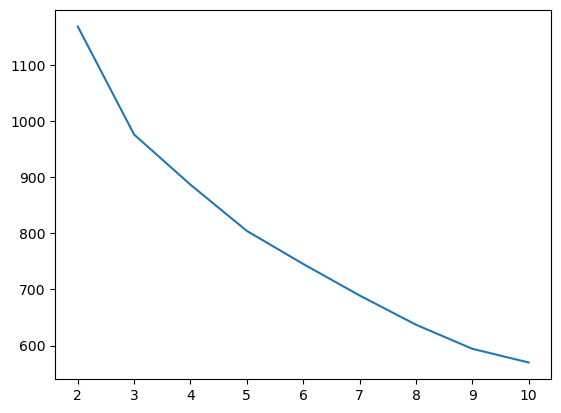

In [37]:
sns.lineplot(x=list(range(2, 11)), y=km_inertias[2:])

<AxesSubplot:>

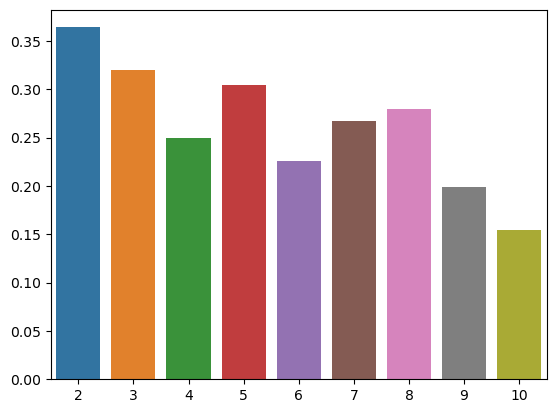

In [39]:
sns.barplot(x=list(range(2, 11)), y=km_sils[2:])

In [43]:
for x in range(2, 11):
    sel_feat['km'+str(x)+'cluster'] = km_labels[x]
    print(sel_feat['km'+str(x)+'cluster'].value_counts())
    print()

km2cluster
1    85
0    53
Name: count, dtype: int64

km3cluster
2    66
1    40
0    32
Name: count, dtype: int64

km4cluster
0    63
3    37
1    23
2    15
Name: count, dtype: int64

km5cluster
1    41
2    31
3    27
0    21
4    18
Name: count, dtype: int64

km6cluster
0    36
4    33
3    22
2    17
5    15
1    15
Name: count, dtype: int64

km7cluster
3    33
0    30
1    22
2    21
6    15
4    12
5     5
Name: count, dtype: int64

km8cluster
0    32
7    23
5    22
6    21
4    18
2    18
1     3
3     1
Name: count, dtype: int64

km9cluster
3    28
0    20
5    19
2    18
4    16
7    12
1    12
6     8
8     5
Name: count, dtype: int64

km10cluster
8    29
1    26
9    23
7    18
6    15
3    10
2     6
0     6
4     3
5     2
Name: count, dtype: int64



<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

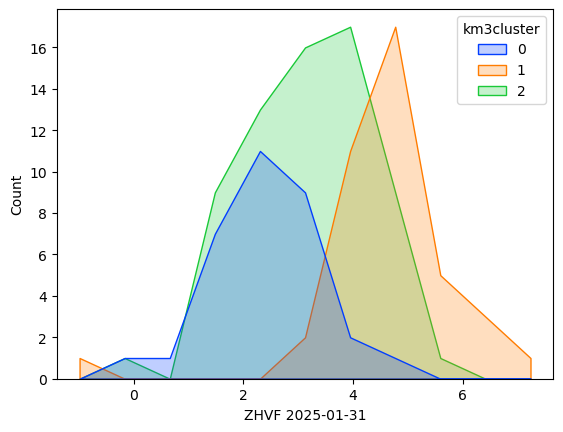

In [44]:
sns.histplot(data=sel_feat, x='ZHVF 2025-01-31', hue='km3cluster', element='poly', palette='bright')

No handles with labels found to put in legend.


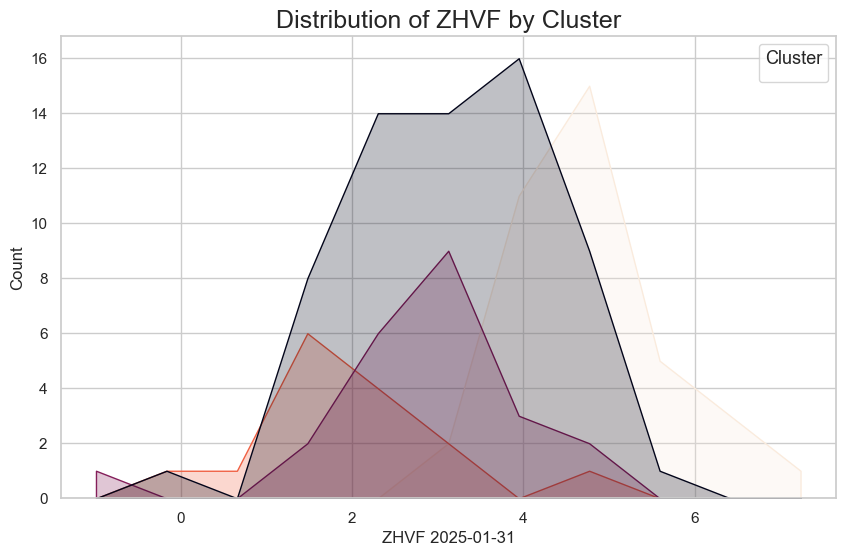

In [113]:
palette = 'rocket'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
histplot = sns.histplot(
    data=sel_feat,
    x='ZHVF 2025-01-31',
    hue='km4cluster',
    element='poly',
    palette=palette
)
plt.title('Distribution of ZHVF by Cluster', fontsize=18)
plt.xlabel('ZHVF 2025-01-31', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='11')
#sns.despine(trim=True)
#plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='3yr pct change ZORI'>

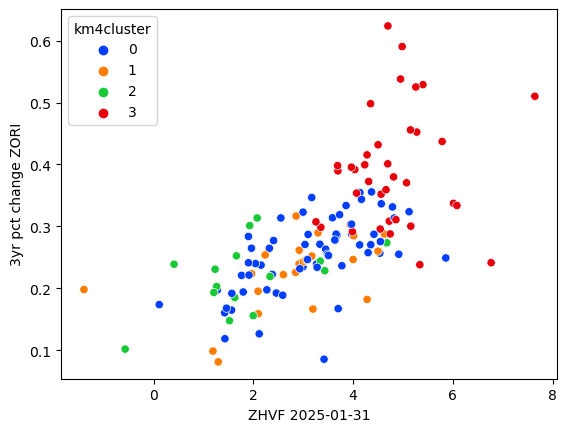

In [99]:
sns.scatterplot(data=sel_feat, x='ZHVF 2025-01-31', y='3yr pct change ZORI', hue='km4cluster', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='3yr pct change Sales'>

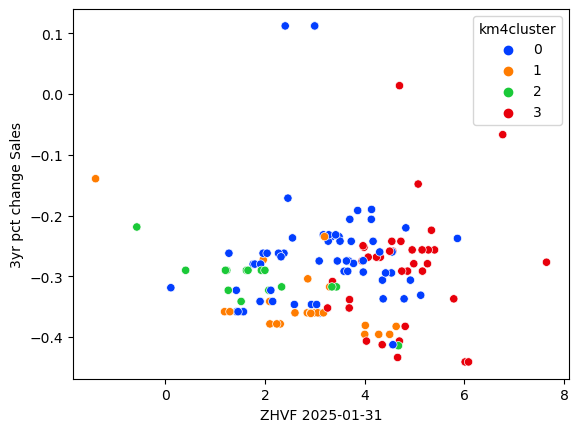

In [100]:
sns.scatterplot(data=sel_feat, x='ZHVF 2025-01-31', y='3yr pct change Sales', hue='km4cluster', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

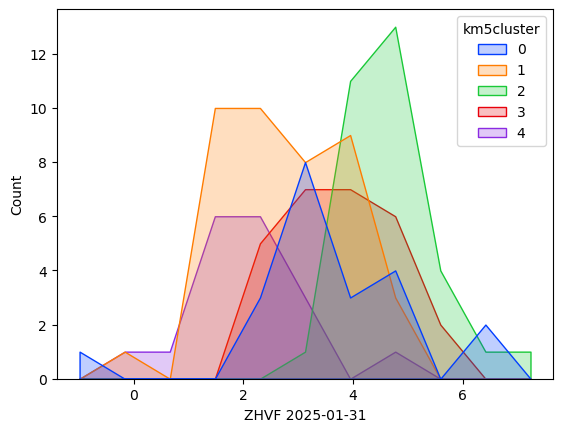

In [46]:
sns.histplot(data=sel_feat, x='ZHVF 2025-01-31', hue='km5cluster', element='poly', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

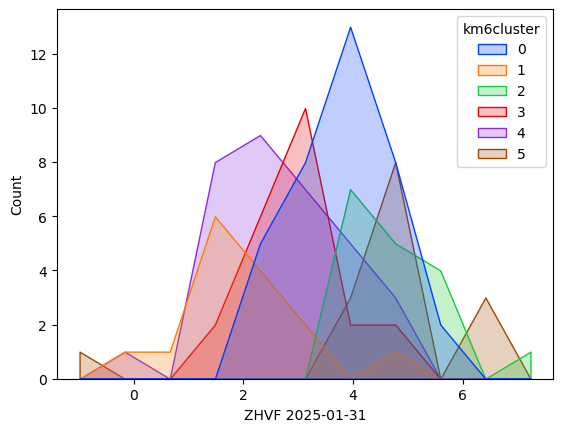

In [47]:
sns.histplot(data=sel_feat, x='ZHVF 2025-01-31', hue='km6cluster', element='poly', palette='bright')

### Hierarchical

In [51]:
agg_models = [None, None]
agg_sils = [None, None]
agg_labels = [None, None]
agg_cluster_sils = [None, None]

for x in range(2, 11):
    model = AgglomerativeClustering(n_clusters=x)
    model.fit(scaled_sf)
    agg_models.append(model)
    agg_labels.append(model.labels_)
    agg_sils.append(silhouette_score(scaled_sf, agg_labels[x], metric='cosine'))
    agg_cluster_sils.append(silhouette_samples(scaled_sf, agg_labels[x], metric='cosine'))

<AxesSubplot:>

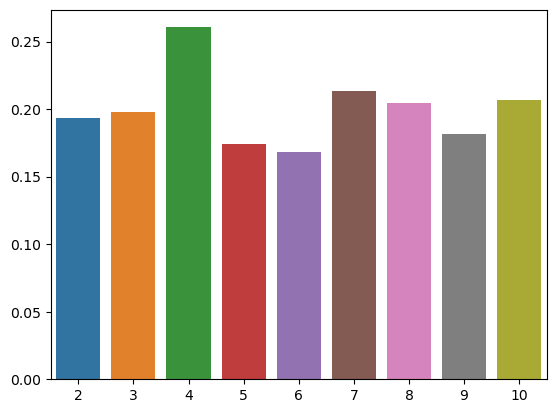

In [52]:
sns.barplot(x=list(range(2, 11)), y=agg_sils[2:])

In [53]:
for x in range(2, 11):
    sel_feat['agg'+str(x)+'cluster'] = agg_labels[x]
    print(sel_feat['agg'+str(x)+'cluster'].value_counts())
    print()

agg2cluster
0    120
1     18
Name: count, dtype: int64

agg3cluster
2    70
0    50
1    18
Name: count, dtype: int64

agg4cluster
0    70
1    30
2    20
3    18
Name: count, dtype: int64

agg5cluster
0    55
1    30
2    20
3    18
4    15
Name: count, dtype: int64

agg6cluster
0    51
1    30
2    20
3    18
4    15
5     4
Name: count, dtype: int64

agg7cluster
1    30
5    29
6    22
0    20
3    18
4    15
2     4
Name: count, dtype: int64

agg8cluster
1    30
2    29
6    22
3    18
4    15
7    14
5     6
0     4
Name: count, dtype: int64

agg9cluster
0    30
2    29
6    22
3    18
1    15
7    14
5     6
4     3
8     1
Name: count, dtype: int64

agg10cluster
2    29
3    22
6    22
1    18
0    15
7    14
4     8
5     6
9     3
8     1
Name: count, dtype: int64



<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

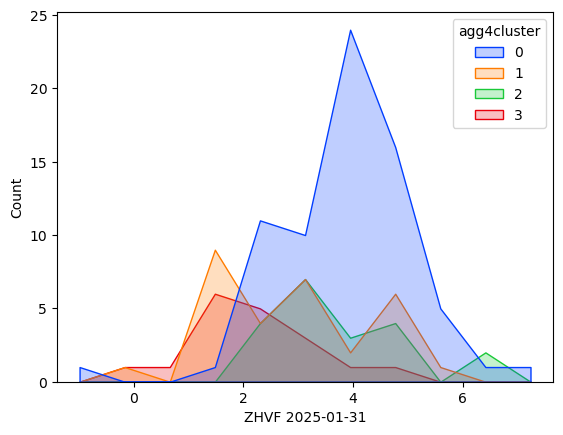

In [54]:
sns.histplot(data=sel_feat, x='ZHVF 2025-01-31', hue='agg4cluster', element='poly', palette='bright')

## Metro Level

### KMeans

In [56]:
met_km_models = [None, None]
met_km_sils = [None, None]
met_km_labels = [None, None]
met_km_cluster_sils = [None, None]
met_km_inertias = [None, None]
for x in range(2, 11):
    model = KMeans(n_clusters=x, init='random', n_init='auto', random_state=50)
    model.fit(scaled_met_sf)
    met_km_models.append(model)
    met_km_labels.append(model.labels_)
    met_km_sils.append(silhouette_score(scaled_met_sf, met_km_labels[x], metric='cosine'))
    met_km_cluster_sils.append(silhouette_samples(scaled_met_sf, met_km_labels[x], metric='cosine'))
    met_km_inertias.append(model.inertia_)

Elbow method

<AxesSubplot:>

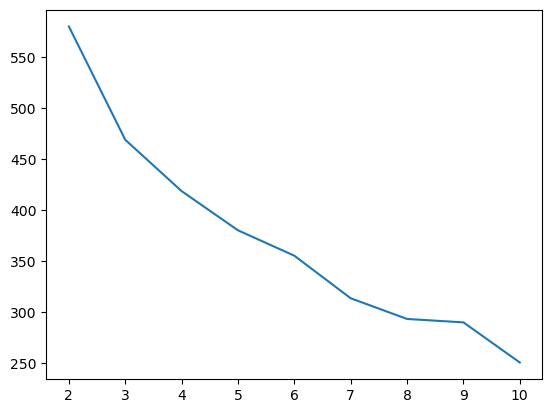

In [57]:
sns.lineplot(x=list(range(2, 11)), y=met_km_inertias[2:])

<AxesSubplot:>

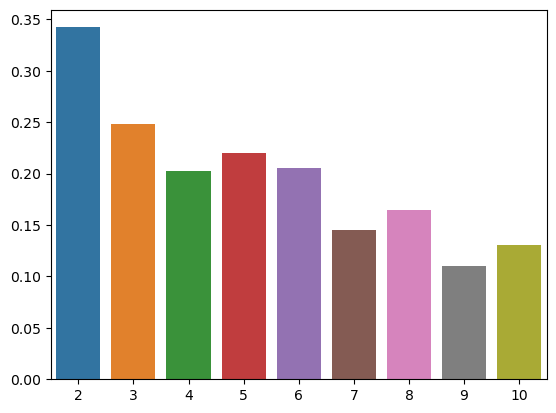

In [58]:
sns.barplot(x=list(range(2, 11)), y=met_km_sils[2:])

In [59]:
for x in range(2, 11):
    met_sel_feat['km'+str(x)+'cluster'] = met_km_labels[x]
    print(met_sel_feat['km'+str(x)+'cluster'].value_counts())
    print()

km2cluster
1    37
0    29
Name: count, dtype: int64

km3cluster
0    39
2    19
1     8
Name: count, dtype: int64

km4cluster
2    34
1    14
0    13
3     5
Name: count, dtype: int64

km5cluster
1    24
3    15
4    13
2    11
0     3
Name: count, dtype: int64

km6cluster
3    17
0    12
5    12
1    11
2    11
4     3
Name: count, dtype: int64

km7cluster
6    20
5    16
2    11
1    10
4     4
0     3
3     2
Name: count, dtype: int64

km8cluster
7    17
6    12
3    11
2    10
1     6
5     5
0     3
4     2
Name: count, dtype: int64

km9cluster
5    15
3    13
1    11
0     8
4     5
7     4
2     4
8     3
6     3
Name: count, dtype: int64

km10cluster
7    13
8    12
0    10
4     7
3     6
9     5
1     5
6     4
5     2
2     2
Name: count, dtype: int64



### Hierarchical

In [61]:
met_agg_models = [None, None]
met_agg_sils = [None, None]
met_agg_labels = [None, None]
met_agg_cluster_sils = [None, None]

for x in range(2, 11):
    model = AgglomerativeClustering(n_clusters=x)
    model.fit(scaled_met_sf)
    met_agg_models.append(model)
    met_agg_labels.append(model.labels_)
    met_agg_sils.append(silhouette_score(scaled_met_sf, met_agg_labels[x], metric='cosine'))
    met_agg_cluster_sils.append(silhouette_samples(scaled_met_sf, met_agg_labels[x], metric='cosine'))

<AxesSubplot:>

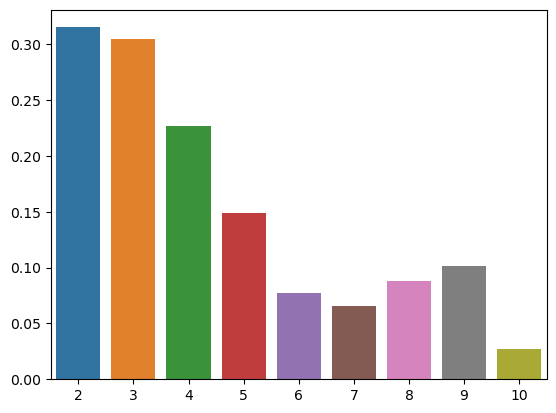

In [62]:
sns.barplot(x=list(range(2, 11)), y=met_agg_sils[2:])

In [63]:
for x in range(2, 11):
    met_sel_feat['agg'+str(x)+'cluster'] = met_agg_labels[x]
    print(met_sel_feat['agg'+str(x)+'cluster'].value_counts())
    print()

agg2cluster
0    39
1    27
Name: count, dtype: int64

agg3cluster
2    29
0    27
1    10
Name: count, dtype: int64

agg4cluster
2    29
3    23
0    10
1     4
Name: count, dtype: int64

agg5cluster
2    29
1    23
3     8
0     4
4     2
Name: count, dtype: int64

agg6cluster
2    29
0    23
1     8
3     3
4     2
5     1
Name: count, dtype: int64

agg7cluster
0    29
6    16
1     8
2     7
3     3
4     2
5     1
Name: count, dtype: int64

agg8cluster
1    20
6    16
3     9
0     8
2     7
7     3
4     2
5     1
Name: count, dtype: int64

agg9cluster
1    20
2    16
3     9
0     7
6     5
8     3
7     3
4     2
5     1
Name: count, dtype: int64

agg10cluster
0    20
2    16
3     9
4     6
6     5
8     3
7     3
1     2
9     1
5     1
Name: count, dtype: int64



## Comparing KMeans and Hierarchical Clusters at County Level

In [68]:
df = pd.merge(df, sel_feat, left_index=True, right_index=True)
df.columns[-20:]

Index(['3yr pct change Days on Market', '3yr pct change New Construction',
       'km2cluster_y', 'km3cluster_y', 'km4cluster_y', 'km5cluster_y',
       'km6cluster_y', 'km7cluster_y', 'km8cluster_y', 'km9cluster_y',
       'km10cluster_y', 'agg2cluster_y', 'agg3cluster_y', 'agg4cluster_y',
       'agg5cluster_y', 'agg6cluster_y', 'agg7cluster_y', 'agg8cluster_y',
       'agg9cluster_y', 'agg10cluster_y'],
      dtype='object')

In [69]:
df = df.dropna(subset=['km2cluster_y', 'km3cluster_y', 'km4cluster_y', 'km5cluster_y',
       'km6cluster_y', 'km7cluster_y', 'km8cluster_y', 'km9cluster_y',
       'km10cluster_y', 'agg2cluster_y', 'agg3cluster_y', 'agg4cluster_y',
       'agg5cluster_y', 'agg6cluster_y', 'agg7cluster_y', 'agg8cluster_y',
       'agg9cluster_y', 'agg10cluster_y'])

In [71]:
df[['State', 'CountyName', 'km2cluster_y', 'agg2cluster_y']]

,State,CountyName,km2cluster_y,agg2cluster_y
2,ID,Ada County,1,0
6,CO,Adams County,0,0
15,NY,Albany County,1,0
24,PA,Allegheny County,0,0
34,MD,Anne Arundel County,0,0
...,...,...,...,...
1530,MN,Washington County,0,0
1534,OR,Washington County,0,0
1544,MI,Wayne County,1,0
1551,UT,Weber County,1,0


In [74]:
for x in range(3, 7):
    print(str(x)+ ' clusters Jaccard Score:')
    print(jaccard_score(km_labels[x], agg_labels[x], average='micro'))
    print()

3 clusters Jaccard Score:
0.22123893805309736

4 clusters Jaccard Score:
0.1694915254237288

5 clusters Jaccard Score:
0.06563706563706563

6 clusters Jaccard Score:
0.09523809523809523



In [75]:
for x in range(3, 7):
    print(str(x)+ ' clusters Jaccard Score:')
    print(jaccard_score(km_labels[x], agg_labels[x], average='macro'))
    print()

3 clusters Jaccard Score:
0.18738105694627435

4 clusters Jaccard Score:
0.11241313478426881

5 clusters Jaccard Score:
0.058976833976833974

6 clusters Jaccard Score:
0.0710614921141237



# Visualizations

In [124]:
sel_feat.sort_values('ZHVF 2025-01-31', ascending=True).head(2)

,ZORI 2023,ZHVI 2023,ZHVF 2025-01-31,Transit Score,NatWalkInd,3yr pct change ZHVI,3yr pct change ZORI,3yr pct change Sale Listings,3yr pct change Sales,3yr pct change Days on Market,...,km10cluster,agg2cluster,agg3cluster,agg4cluster,agg5cluster,agg6cluster,agg7cluster,agg8cluster,agg9cluster,agg10cluster
1080,1595.035908,2.849239e+05,-1.400000,7.400000,13.797787,0.095476,0.198020,0.644653,-0.139439,-0.025367,...,0,0,2,0,0,5,2,0,8,8
1318,3490.305284,1.720671e+06,-0.573214,6.678431,13.554884,0.234122,0.101794,-0.300488,-0.218875,-0.081340,...,6,1,1,3,3,3,3,3,3,1


In [125]:
sel_feat = sel_feat.drop([1080, 1318])

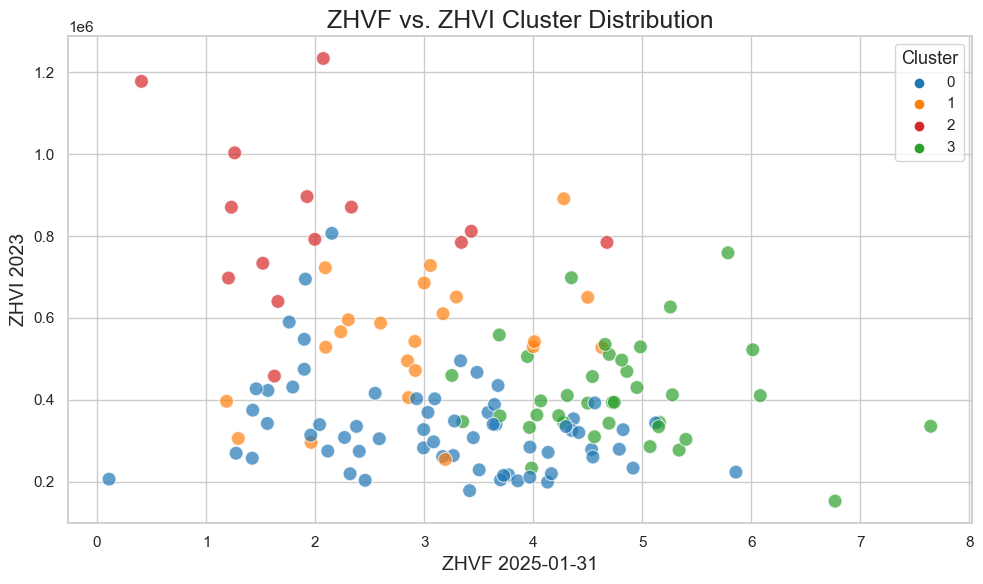

In [143]:
sns.set_style("whitegrid")
palette = sns.color_palette("hls", n_colors=4)
palette = ['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c']
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(
    data=sel_feat,
    x='ZHVF 2025-01-31',
    y='ZHVI 2023',
    hue='km4cluster',
    palette=palette,
    s=100,
    alpha=0.7
)

plt.title('ZHVF vs. ZHVI Cluster Distribution', fontsize=18)
plt.xlabel('ZHVF 2025-01-31', fontsize=14)
plt.ylabel('ZHVI 2023', fontsize=14)

handles, labels = scatterplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Cluster', title_fontsize='13', fontsize='11')

# Remove the top and right spines to make the plot cleaner
#sns.despine()
plt.tight_layout()
plt.show()

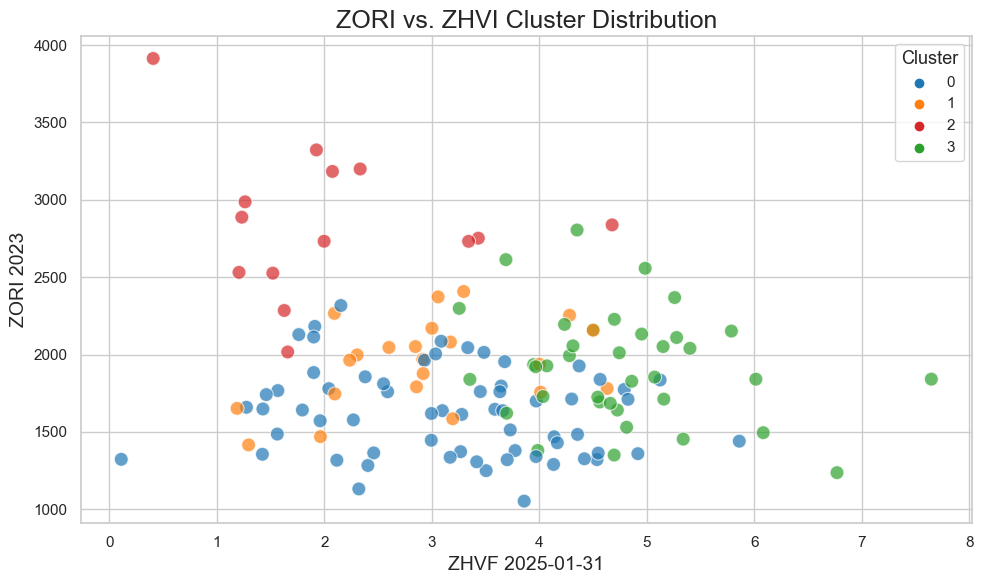

In [146]:
sns.set_style("whitegrid")
palette = sns.color_palette("hls", n_colors=4)
palette = ['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c']
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(
    data=sel_feat,
    x='ZHVF 2025-01-31',
    y='ZORI 2023',
    hue='km4cluster',
    palette=palette,
    s=100,
    alpha=0.7
)

plt.title('ZORI vs. ZHVI Cluster Distribution', fontsize=18)
plt.xlabel('ZHVF 2025-01-31', fontsize=14)
plt.ylabel('ZORI 2023', fontsize=14)

handles, labels = scatterplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Cluster', title_fontsize='13', fontsize='11')

# Remove the top and right spines to make the plot cleaner
#sns.despine()
plt.tight_layout()
plt.show()

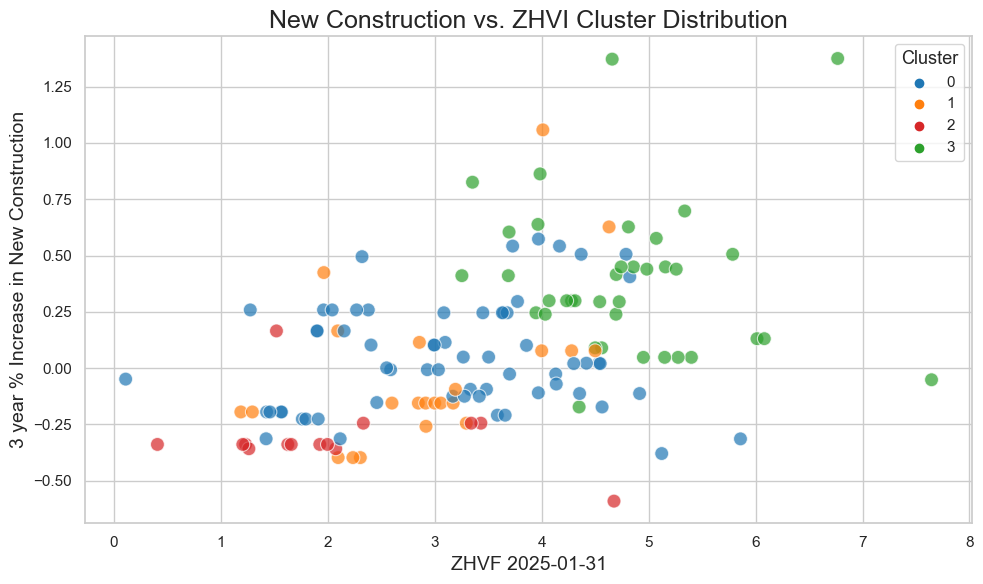

In [148]:
sns.set_style("whitegrid")
palette = sns.color_palette("hls", n_colors=4)
palette = ['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c']
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(
    data=sel_feat,
    x='ZHVF 2025-01-31',
    y='3yr pct change New Construction',
    hue='km4cluster',
    palette=palette,
    s=100,
    alpha=0.7
)

plt.title('New Construction vs. ZHVI Cluster Distribution', fontsize=18)
plt.xlabel('ZHVF 2025-01-31', fontsize=14)
plt.ylabel('3 year % Increase in New Construction', fontsize=14)

handles, labels = scatterplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Cluster', title_fontsize='13', fontsize='11')

# Remove the top and right spines to make the plot cleaner
#sns.despine()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


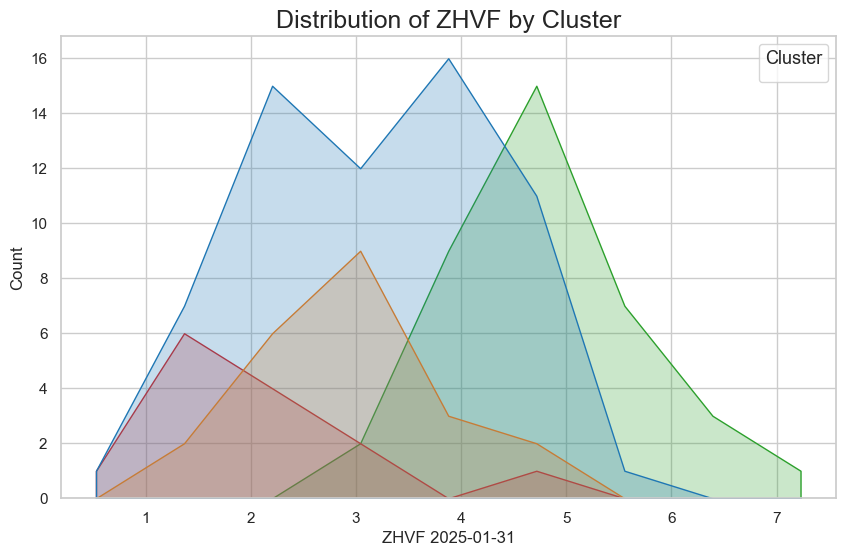

In [150]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
histplot = sns.histplot(
    data=sel_feat,
    x='ZHVF 2025-01-31',
    hue='km4cluster',
    element='poly',
    palette=palette
)
plt.title('Distribution of ZHVF by Cluster', fontsize=18)
plt.xlabel('ZHVF 2025-01-31', fontsize=12)
plt.ylabel('Count', fontsize=12)
handles, labels = scatterplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Cluster', title_fontsize='13', fontsize='11')
plt.legend(title='Cluster', title_fontsize='13', fontsize='11')
#sns.despine(trim=True)
#plt.tight_layout()
plt.show()

In [151]:
df.head()

,State,CountyName,ZHVI 2003,ZHVI 2008,ZHVI 2013,ZHVI 2018,ZHVI 2019,ZHVI 2020,ZHVI 2021,ZHVI 2022,...,km10cluster_y,agg2cluster_y,agg3cluster_y,agg4cluster_y,agg5cluster_y,agg6cluster_y,agg7cluster_y,agg8cluster_y,agg9cluster_y,agg10cluster_y
2,ID,Ada County,162333.630363,230910.249611,197273.939126,301233.694892,337018.459037,380146.143065,517107.331426,572448.199052,...,5,0,0,2,2,2,0,5,5,5
6,CO,Adams County,214792.225390,192159.627949,197393.656674,343590.623541,359908.059713,380112.036043,442597.829497,508068.799228,...,7,0,0,2,2,2,0,7,7,7
15,NY,Albany County,130345.771316,195419.741706,181135.174229,201190.831096,208678.534541,218351.229248,245095.135986,269704.495852,...,4,0,2,0,0,5,2,0,4,9
24,PA,Allegheny County,100750.800749,116946.244818,118519.773772,149619.810094,157102.156548,166916.759941,190666.991495,201978.246799,...,9,0,0,1,1,1,1,1,0,3
34,MD,Anne Arundel County,304886.186530,452515.481728,401364.829173,448425.521639,457938.511871,475119.500857,538002.124064,579167.166676,...,8,0,0,1,1,1,1,1,0,3


In [155]:
df[['State', 'CountyName', 'km4cluster_y']][df['km4cluster_y']==3]

,State,CountyName,km4cluster_y
2,ID,Ada County,3
102,NM,Bernalillo County,3
167,NC,Cabarrus County,3
186,ID,Canyon County,3
223,SC,Charleston County,3
301,TX,Collin County,3
415,NC,Durham County,3
416,FL,Duval County,3
492,OH,Franklin County,3
499,CA,Fresno County,3


In [157]:
df[['State', 'CountyName', 'km4cluster_y']][df['km4cluster_y']==2]

,State,CountyName,km4cluster_y
46,VA,Arlington County,2
141,NY,Bronx County,2
447,CT,Fairfield County,2
768,NY,Kings County,2
875,CA,Los Angeles County,2
961,MA,Middlesex County,2
1025,NY,Nassau County,2
1034,NY,New York County,2
1046,MA,Norfolk County,2
1072,CA,Orange County,2


In [158]:
df[df['km4cluster_y']==3]['State'].value_counts()

State
FL    15
NC     5
CA     3
ID     2
NM     2
TX     2
TN     2
UT     2
SC     1
OH     1
RI     1
AZ     1
Name: count, dtype: int64